# Demo notebook

This notebook demonstrates how to fit 1- and 2-variable linear models using `sklearn`'s `LinearRegression` class

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 1-Variable regression

#### Generate simulated data

In [13]:
# true parameters
m_true = 0.5
b_true = 3

In [17]:
# function for generating data as "true line plus gaussian noise"
def generate_1D_data(m: float, b: float, npoints: int = 10, sigma: float = 0.1):
    x = np.random.random(size=npoints)
    y_perfect = x * m + b
    y = y_perfect + sigma * np.random.randn(npoints)
    return x, y

In [20]:
# generate the data
x, y = generate_1D_data(m_true, b_true)

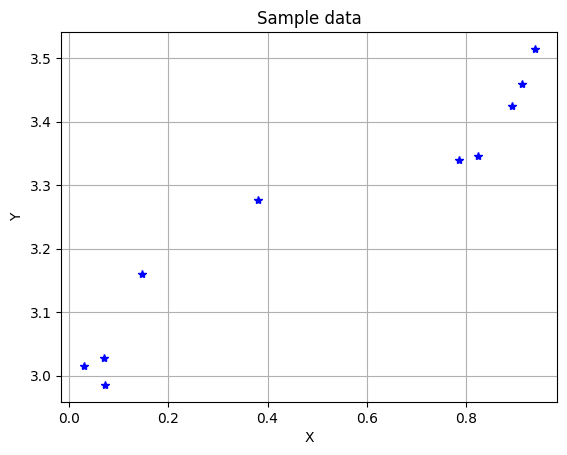

In [22]:
# visualize the data
plt.plot(x, y, '*b')
ax = plt.gca()
ax.set_title('Sample data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

#### Fit the data

In [23]:
# fit the linear regression model
model = LinearRegression()
model.fit(x.reshape(10,1),y)

LinearRegression()

In [24]:
# define a function for inspecting "best fit" parameters
def display_fit_params(fit_model):
    print(f"scaling coefficients: {model.coef_}")
    print(f"intercept: {model.intercept_}")


#### Visualize the fit

In [26]:
# display the fit parameters.  Note these are close to our "true" values of 0.5 and 3
display_fit_params(model)

scaling coefficients: [0.47173119]
intercept: 3.0160378349646564


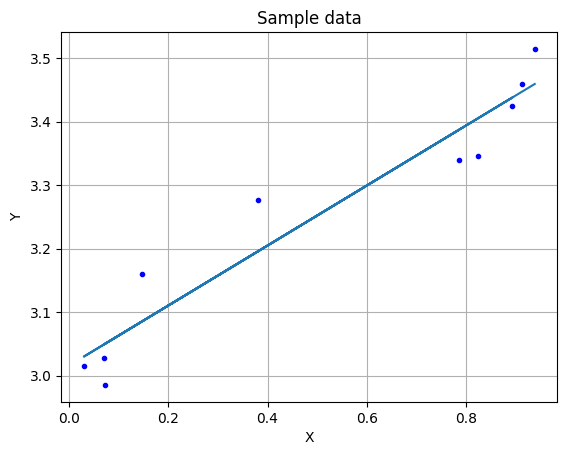

In [30]:
# visualize fit against the data
plt.plot(x, y, '.b')
plt.plot(x, model.coef_ * x + model.intercept_)
ax = plt.gca()
ax.set_title('Sample data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# 2 variable regression

Here we'll fit something of the form:

$z = \alpha * x + \beta * y + \gamma$


#### Generate the data

In [85]:
# function for generating data as "true line plus gaussian noise"
def generate_2D_data(alpha: float, beta: float, gamma: float, npoints: int = 20, sigma: float = 0.1):
    x = np.random.random(size=npoints)
    y = np.random.random(size=npoints)
    z_perfect = x * alpha + y * beta + gamma
    z = z_perfect #+ sigma * np.random.randn(npoints)
    return x, y, z

In [88]:
alpha_true = 1.0
beta_true = 3.0
gamma_true = 8.0
npoints = 20

x, y, z = generate_2D_data(alpha_true, beta_true, gamma_true, npoints)

#### Plot the data

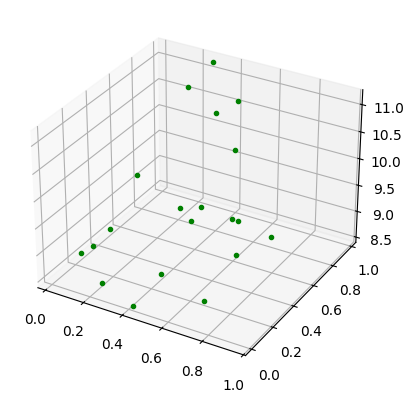

In [90]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x, y, z, '.g')

#### Fit the data

Note that the to use the `fit` method, we need a single array holding x and y as columns

In [74]:
# X is just an array whose first column is x and second column is y
X = np.array([x, y]).reshape(2, npoints).T
X

array([[0.5074989 , 0.87308096],
       [0.67421563, 0.56137666],
       [0.5010519 , 0.38295253],
       [0.01187934, 0.62447484],
       [0.61833674, 0.29825057],
       [0.46021674, 0.23503175],
       [0.22987175, 0.23913704],
       [0.52248726, 0.43927126],
       [0.14333526, 0.08572766],
       [0.6478968 , 0.51419118],
       [0.16575716, 0.1524118 ],
       [0.21109817, 0.30811878],
       [0.43583443, 0.91601777],
       [0.29848307, 0.14678647],
       [0.26826921, 0.71752709],
       [0.60763294, 0.98139165],
       [0.87051839, 0.68622268],
       [0.56976403, 0.04972667],
       [0.74762218, 0.47909616],
       [0.65975548, 0.70257505]])

In [75]:
model2 = LinearRegression()
model2.fit(X, z)

LinearRegression()

#### Visualize the fit

In [76]:
display_fit_params(model2)

scaling coefficients: [ 0.18083482 -1.0437461 ]
intercept: 10.514487728387401


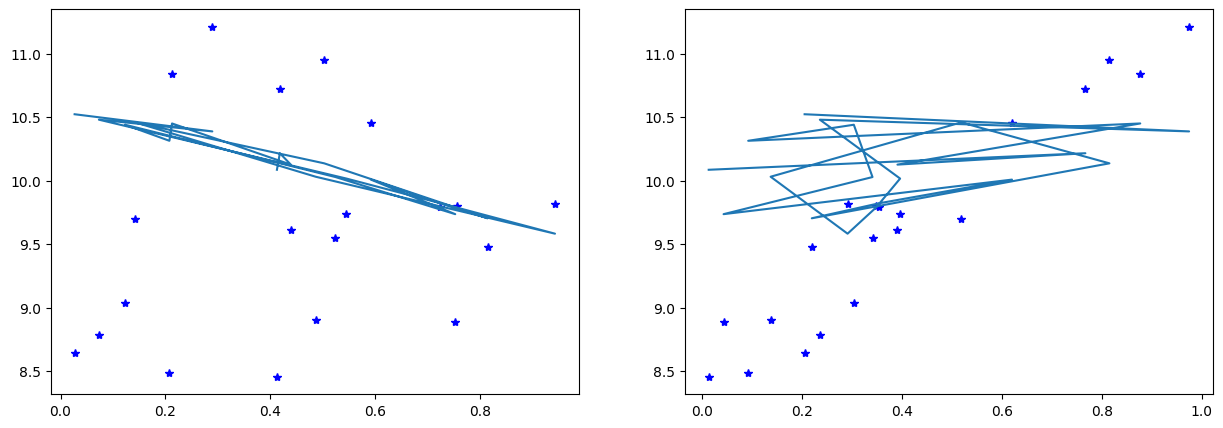

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(x, z, '*b')
ax[0].plot(x, model.coef_[1] * x +   model.coef_[0] * y + model.intercept_)
ax[1].plot(y, z, '*b')
ax[1].plot(y, model.coef_[1] * x +   model.coef_[0] * y + model.intercept_)